# Sequence Alignment using Dotplot

+ A dot plot is a graphical method that allows the comparison of two biological sequences and identify regions of close similarity between them
+ Simplest method - put a dot wherever sequences are identical
+ Dot plots compare two sequences by organizing one sequences on the x-axis, and another on the y-axis of a plot
- when the residues of both sequences match at the same location on the plot, a dot is drawn at the corresponding position


### Usefulness

+ Dot plots can also be used to visually inspect sequences for:
    - direct or inverted repeats
    - regions with low sequences complexity
    - similar regions
    - repeated sequences
    - sequence rearrangements
    - RNA structures
    - Gene order

In [13]:
def delta(x,y):
    return 0 if x==y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k], seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M, t, seq1, seq2, nonblank=chr(0x25A0), blank=" "):
    print(" |" + seq2)
    print("-" * (2 + len(seq2)))
    
    for label,row in zip(seq1,M):
        line = "".join(nonblank if s < t else blank for s in row)
        print(label + "|" + line)
        

def dotplot(seq1 ,seq2 ,k=1, t=1):
    M = makeMatrix(seq1, seq2, k)
    plotMatrix(M, t, seq1, seq2)

In [8]:
from Bio.Seq import Seq

In [11]:
seq1 = Seq("ACTTAG")
seq2 = Seq("AC")

In [14]:
dotplot(seq1,seq2)

 |AC
----
A|■ 
C| ■
T|  
T|  
A|■ 
G|  


In [15]:
# show Identical
dotplot(seq1,seq1)

 |ACTTAG
--------
A|■   ■ 
C| ■    
T|  ■■  
T|  ■■  
A|■   ■ 
G|     ■


In [16]:
dotplot("AAACTB","ACBTCAA")

 |ACBTCAA
---------
A|■    ■■
A|■    ■■
A|■    ■■
C| ■  ■  
T|   ■   
B|  ■    


In [18]:
import numpy as np
import matplotlib.pyplot as plt

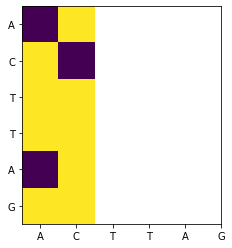

In [19]:
# beautify makepmatrix
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt = plt.xticks(np.arange(len(list(seq1))), list(seq1))
yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))
plt.show()

In [20]:
# convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq2
    xt = plt.xticks(np.arange(len(list(seq2))), list(seq2))
    
    # on y-axis list all sequences of seq1
    yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))
    plt.show()

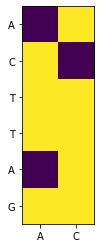

In [21]:
dotplotx(seq1, seq2)

In [22]:
DNA1 = Seq("ATGATCTCGTAA")
DNA2 = Seq("ATTATGTCGTAA")

In [24]:
dotplot(DNA1,DNA2)

 |ATTATGTCGTAA
--------------
A|■  ■      ■■
T| ■■ ■ ■  ■  
G|     ■  ■   
A|■  ■      ■■
T| ■■ ■ ■  ■  
C|       ■    
T| ■■ ■ ■  ■  
C|       ■    
G|     ■  ■   
T| ■■ ■ ■  ■  
A|■  ■      ■■
A|■  ■      ■■


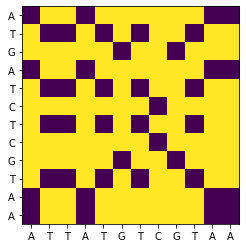

In [23]:
dotplotx(DNA1,DNA2)

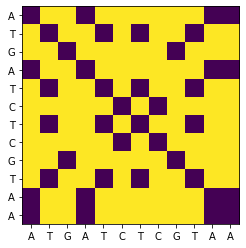

In [26]:
dotplotx(DNA1,DNA1)

# Well Done!